To solve any problem in machine learning, we have to follow some steps.
    1. Problem formation
    2. Data collection
    3. Algorithm/Method selection
    4. Evaluate

In [2]:
import numpy as np
import pandas as pn
import math as m
import random as rand

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X = pn.read_csv("X.csv",header=None)


In [5]:
X = np.asarray(X)
X.shape

(5000, 400)

In [6]:
Y = pn.read_csv("Y.csv",header=None)

In [7]:
Y = np.asarray(Y)
Y.shape

(5000, 1)

In [8]:
#visualising
digit = X[1600 , :]
digitm = np.reshape(digit, (20,20) )

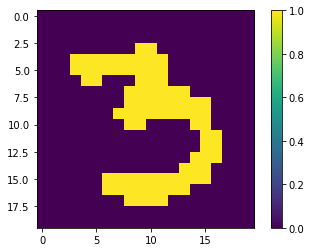

1


In [9]:
import matplotlib.pyplot as plt

plt.imshow(( np.reshape( X[1600, :], (20,20) )) .T); #20,20 as the rectangle size is same for all pics now
plt.colorbar()
plt.show()

print(Y[500,0])           #a row from X gives the image, corresponding row from Y gives the label


### Using Naive Bayesian to solve the problem

When counting the probability, we might face underflow when multiplying 400 variables all less than 1.
So we'll ommit the divided by 500's. But in that case we might face overflow. So we'll take the logarithmic value of the probability and use their sum.

Steps 
    1. Calculate probability of C = 1, C = 2...............C = 10
    2. Calculate probablbity of the pixels for each digit
    3. Find the largest probability

In [39]:

def naiveBaysian(X,Y,test):
    prob = []

    for j in range (1,11):


        #Probability of the pixels givel the digit
        probability = 0

        for i in range (0, X.shape[1]):
            
            strt = (500 * (j - 1))
            end = strt + 500
            
            cnt = sum(X[strt :end, i])

            cnt = cnt + 1

            if (test[i] == 0):
                cnt = 501 - cnt

            probability = probability + m.log10(cnt)    

        prob.insert(j, probability)

    maxProb = max(prob)
    res = 0

    for i in range (0, len(prob)):
        if (prob[i] == maxProb):
            res = i

    return res
            
        
    
        
    

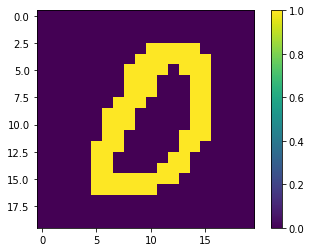

With Naive Baysian: 0


In [42]:
test_X = X[400 , :]
plt.imshow(( np.reshape( test_X, (20,20) )) .T); #20,20 as the rectangle size is same for all pics now
plt.colorbar()
plt.show()

print ("With Naive Baysian: ", end = "")
print (naiveBaysian(X,Y,test_X))


